In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
    # Read data from text file
df1 = pd.read_csv('wine.data', delimiter=',')

df1.columns = ['Class','Alcohol', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
              'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines','Proline']

df1

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Apply standard scaler and normalize the data

In [3]:
from sklearn.preprocessing import StandardScaler

    # Apply normalization using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df1)

In [4]:
normalized_data

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

# PCA with Standard scaler data

In [5]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)      
pca_result

array([[ 2.5517695 ,  0.30101254],
       [ 2.8035401 , -1.06447157],
       [ 3.92729256, -2.80976047],
       [ 1.42286065, -0.88765652],
       [ 3.29370966, -2.17293586],
       [ 2.76479502, -1.20871177],
       [ 2.40140361, -1.64137735],
       [ 2.8075049 , -0.96277125],
       [ 3.023474  , -0.82711929],
       [ 3.6923748 , -1.3590378 ],
       [ 2.12552015, -0.64712201],
       [ 2.45742511, -0.71152348],
       [ 3.68624242, -1.18570706],
       [ 4.44826905, -2.16012053],
       [ 2.61808824, -1.70240541],
       [ 2.47821747, -2.36836584],
       [ 2.23520031, -1.66864391],
       [ 3.74745458, -2.5772015 ],
       [ 2.40727493, -1.09016058],
       [ 3.34791581, -0.83170731],
       [ 1.50540697, -0.25191854],
       [ 2.85243912,  0.0583414 ],
       [ 2.0363861 ,  0.49471404],
       [ 2.14235027,  0.29418835],
       [ 1.41371013, -0.95671132],
       [ 2.15438713, -0.71139911],
       [ 1.65213432,  0.0624119 ],
       [ 2.52584634, -0.72328823],
       [ 2.58015584,

In [6]:
    # Create a new dataframe with PCA results
df_pca_normalized = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [7]:
df_pca_normalized

,PC1,PC2
0,2.551769,0.301013
1,2.803540,-1.064472
2,3.927293,-2.809760
3,1.422861,-0.887657
4,3.293710,-2.172936
...,...,...
172,-3.624646,-2.181813
173,-2.938786,-1.737918
174,-3.034697,-2.738003
175,-2.760688,-2.278545


In [8]:
df_pca_normalized['Class'] = df1['Class']                   ## add the class column in the pca_df 
df_pca_normalized

,PC1,PC2,Class
0,2.551769,0.301013,1
1,2.803540,-1.064472,1
2,3.927293,-2.809760,1
3,1.422861,-0.887657,1
4,3.293710,-2.172936,1
...,...,...,...
172,-3.624646,-2.181813,3
173,-2.938786,-1.737918,3
174,-3.034697,-2.738003,3
175,-2.760688,-2.278545,3


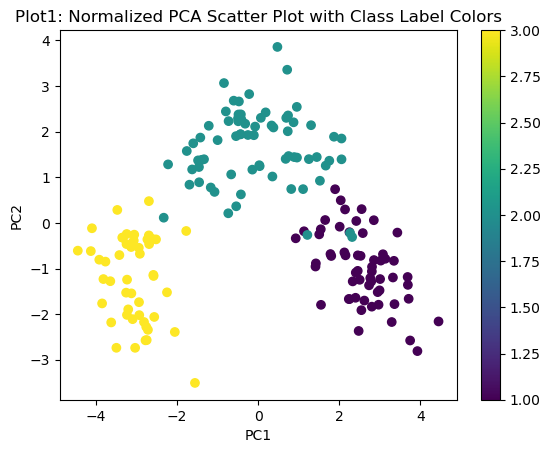

In [9]:
plt.scatter(x=df_pca_normalized['PC1'], y=df_pca_normalized['PC2'], c=df_pca_normalized['Class'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot1: Normalized PCA Scatter Plot with Class Label Colors')
plt.colorbar()
plt.show()

# KMean clustering in PCA_df

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans_normalized = KMeans(n_clusters=3)                   ## there are 3 classes.... so the total number of cluster group is 3 

cluster_labels_normalized = kmeans_normalized.fit_predict(normalized_data)

# Add cluster labels to the normalized PCA dataframe
df_pca_normalized['Cluster'] = cluster_labels_normalized

df_pca_normalized

,PC1,PC2,Class,Cluster
0,2.551769,0.301013,1,0
1,2.803540,-1.064472,1,0
2,3.927293,-2.809760,1,0
3,1.422861,-0.887657,1,0
4,3.293710,-2.172936,1,0
...,...,...,...,...
172,-3.624646,-2.181813,3,1
173,-2.938786,-1.737918,3,1
174,-3.034697,-2.738003,3,1
175,-2.760688,-2.278545,3,1


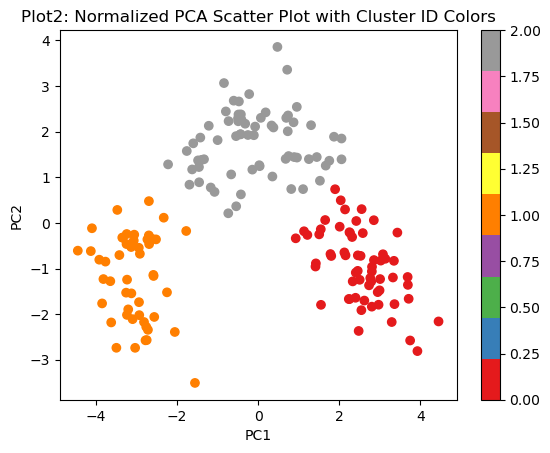

In [12]:
plt.scatter(x=df_pca_normalized['PC1'], y=df_pca_normalized['PC2'], c=df_pca_normalized['Cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot2: Normalized PCA Scatter Plot with Cluster ID Colors')
plt.colorbar()
plt.show()

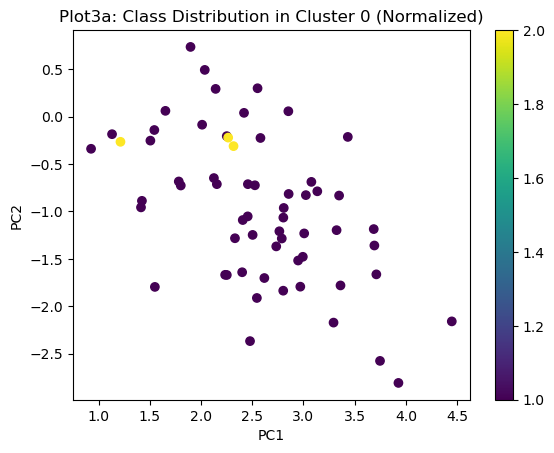

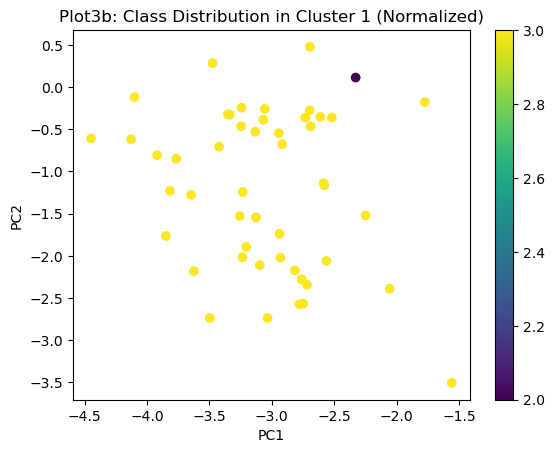

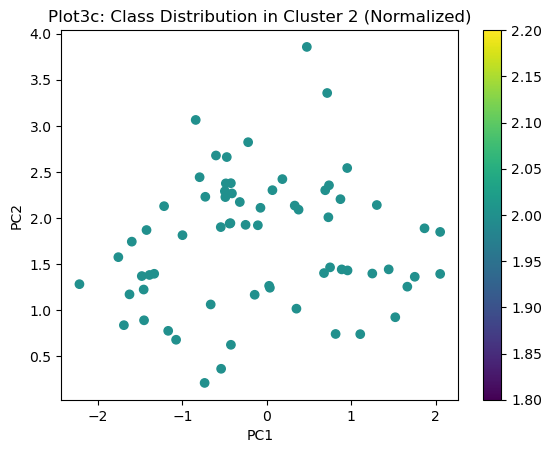

In [13]:
for cluster_id in range(3):
    cluster_df_normalized = df_pca_normalized[df_pca_normalized['Cluster'] == cluster_id]
    plt.scatter(x=cluster_df_normalized['PC1'], y=cluster_df_normalized['PC2'], c=cluster_df_normalized['Class'], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Plot3{chr(97+cluster_id)}: Class Distribution in Cluster {cluster_id} (Normalized)')
    plt.colorbar()
    plt.show()

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

        # Calculate Silhouette Coefficient for normalized data
silhouette_score_normalized = silhouette_score(normalized_data, cluster_labels_normalized)

print(f"Silhouette Coefficient (Normalized): {silhouette_score_normalized}")

Silhouette Coefficient (Normalized): 0.3052703836110603


In [15]:
        # Calculate Davies-Bouldin Index for normalized data
davies_bouldin_score_normalized = davies_bouldin_score(normalized_data, cluster_labels_normalized)

print(f"Davies-Bouldin Index (Normalized): {davies_bouldin_score_normalized}")

Davies-Bouldin Index (Normalized): 1.319747712796911


# Apply MinMax scaler and normalize the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

mScaler_data = m_scaler.fit_transform(df1)

mScaler_data

array([[0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       [0.        , 0.87894737, 0.23913043, ..., 0.30894309, 0.7985348 ,
        0.85734665],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

# PCA with MinMax scaler data

In [17]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  
pca_result2 = pca.fit_transform(mScaler_data)

pca_result2   

array([[-6.83266045e-01, -1.02558887e-02],
       [-7.04561836e-01, -1.88847414e-01],
       [-9.38168113e-01, -5.72759497e-01],
       [-4.58384401e-01, -6.66768680e-02],
       [-7.79882211e-01, -4.86225604e-01],
       [-7.31651603e-01, -2.99828159e-01],
       [-6.77804959e-01, -2.99258637e-01],
       [-6.94355374e-01, -3.08420211e-01],
       [-7.85713685e-01, -2.02864488e-01],
       [-8.69491089e-01, -3.51965976e-01],
       [-5.99576237e-01, -2.30183839e-01],
       [-6.56221908e-01, -2.35266072e-01],
       [-7.97926997e-01, -3.54171121e-01],
       [-9.55057248e-01, -5.30982578e-01],
       [-6.73349650e-01, -3.39619307e-01],
       [-6.36298785e-01, -4.53231167e-01],
       [-5.89788625e-01, -3.20265924e-01],
       [-8.67439734e-01, -5.90762700e-01],
       [-6.54682619e-01, -1.75709245e-01],
       [-8.09699247e-01, -1.21874679e-01],
       [-5.07233584e-01,  4.76395886e-03],
       [-7.71418054e-01,  3.00303739e-03],
       [-6.28133669e-01,  1.10997528e-01],
       [-6.

In [18]:
    # Create a new dataframe with PCA results
df_pca_normalized_2 = pd.DataFrame(data=pca_result2, columns=['PC1', 'PC2'])

df_pca_normalized_2

,PC1,PC2
0,-0.683266,-0.010256
1,-0.704562,-0.188847
2,-0.938168,-0.572759
3,-0.458384,-0.066677
4,-0.779882,-0.486226
...,...,...
172,0.896502,-0.479097
173,0.782183,-0.350987
174,0.819030,-0.549322
175,0.775289,-0.427166


In [19]:
df_pca_normalized_2['Class'] = df1['Class'] 

df_pca_normalized_2

,PC1,PC2,Class
0,-0.683266,-0.010256,1
1,-0.704562,-0.188847,1
2,-0.938168,-0.572759,1
3,-0.458384,-0.066677,1
4,-0.779882,-0.486226,1
...,...,...,...
172,0.896502,-0.479097,3
173,0.782183,-0.350987,3
174,0.819030,-0.549322,3
175,0.775289,-0.427166,3


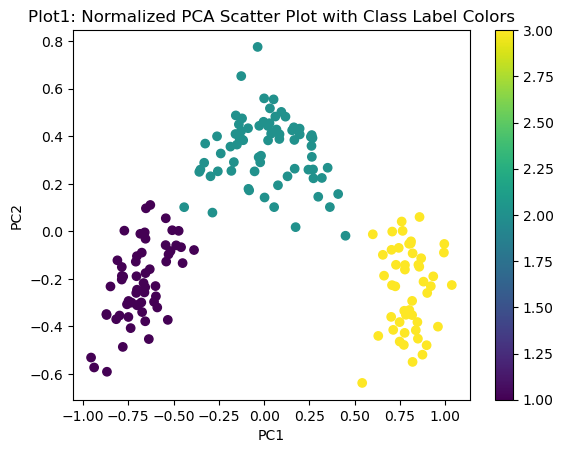

In [20]:
plt.scatter(x=df_pca_normalized_2['PC1'], y=df_pca_normalized_2['PC2'], c=df_pca_normalized_2['Class'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot1: Normalized PCA Scatter Plot with Class Label Colors')
plt.colorbar()
plt.show()

# KMean with MinMax scaler data

In [21]:
kmeans_normalized_2 = KMeans(n_clusters=3) 

cluster_labels_normalized_2 = kmeans_normalized_2.fit_predict(mScaler_data)

# Add cluster labels to the normalized PCA dataframe
df_pca_normalized_2['Cluster'] = cluster_labels_normalized_2

df_pca_normalized_2

,PC1,PC2,Class,Cluster
0,-0.683266,-0.010256,1,1
1,-0.704562,-0.188847,1,1
2,-0.938168,-0.572759,1,1
3,-0.458384,-0.066677,1,1
4,-0.779882,-0.486226,1,1
...,...,...,...,...
172,0.896502,-0.479097,3,0
173,0.782183,-0.350987,3,0
174,0.819030,-0.549322,3,0
175,0.775289,-0.427166,3,0


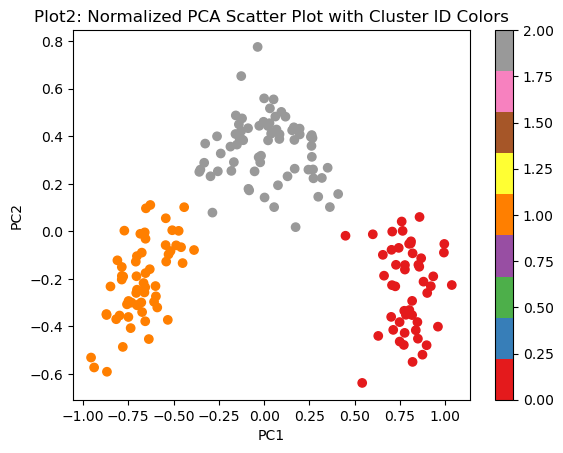

In [22]:
plt.scatter(x=df_pca_normalized_2['PC1'], y=df_pca_normalized_2['PC2'], c=df_pca_normalized_2['Cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot2: Normalized PCA Scatter Plot with Cluster ID Colors')
plt.colorbar()
plt.show()

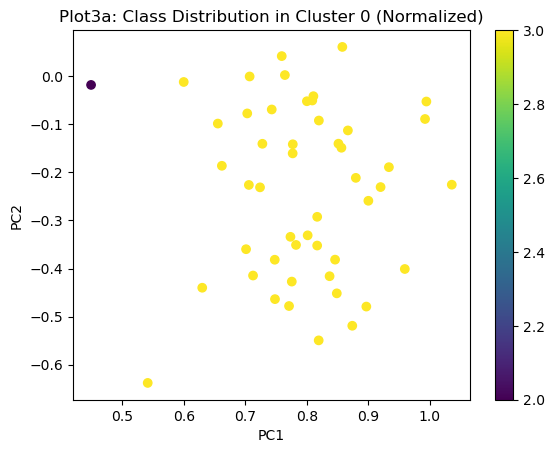

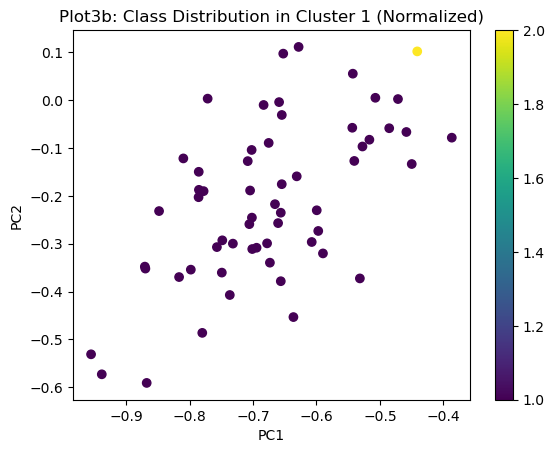

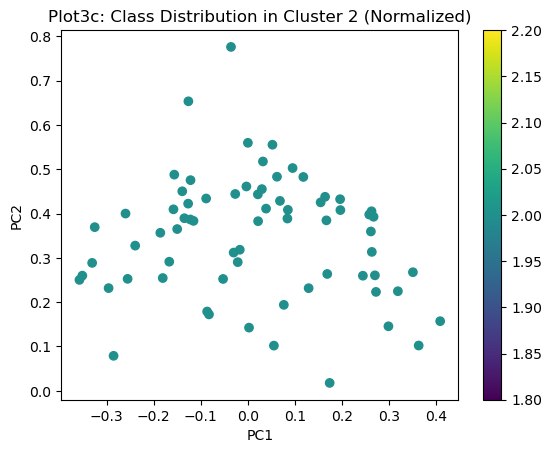

In [23]:
for cluster_id in range(3):
    cluster_df_normalized_2 = df_pca_normalized_2[df_pca_normalized_2['Cluster'] == cluster_id]
    plt.scatter(x=cluster_df_normalized_2['PC1'], y=cluster_df_normalized_2['PC2'], 
                c=cluster_df_normalized_2['Class'], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Plot3{chr(97+cluster_id)}: Class Distribution in Cluster {cluster_id} (Normalized)')
    plt.colorbar()
    plt.show()

In [24]:
        # Calculate Silhouette Coefficient for normalized data
silhouette_score_normalized_2 = silhouette_score(mScaler_data, cluster_labels_normalized_2)

print(f"Silhouette Coefficient (Normalized): {silhouette_score_normalized_2}")

Silhouette Coefficient (Normalized): 0.36835663205162616


In [25]:
        # Calculate Davies-Bouldin Index for normalized data
davies_bouldin_score_normalized_2 = davies_bouldin_score(mScaler_data, cluster_labels_normalized_2)

print(f"Davies-Bouldin Index (Normalized): {davies_bouldin_score_normalized_2}")

Davies-Bouldin Index (Normalized): 1.1139123194106058
